In [1]:
from IPython.core.display import HTML

HTML("<style>" + open("style.css").read() + "</style>")

<div class="headline">
Grundlagen künstlicher Intelligenz
<br><br>
Sommersemester 2020
</div>
<br>
<div class="description">
    Übung zum Thema <i id="topic">"Neural Networks"</i>
    <br><br>
    Deadline Abgabe: <i #id="submission">Freitag, 03.07.2020 (23:55 Uhr)</i>
</div>

# Präsenzübung

Für diese Übung wird benötigt:
* keras
* tensorflow/theano
* opencv-python<br><br>

*For this exercise, the following modules are required*:
* *keras*
* *tensorflow/theano*
* *opencv-python*

<div class="task_description">
    <i class="task">Task 1:</i> <br>
</div>


1. Warum und wofür werden Neural Networks verwendet?<br><br>
*Why and what are neural networks used for?*

2. Wie ist der grundlegende Aufbau eines Neural Networks?<br><br>
*What is the basic structure of a neural network?*

3. Wie wird der Output dieses Neurons berechnet? Als Aktivierungsfunktion verwenden wir ReLu (Rectified Linear Units, y = max(0, x))<br><br>
*How is the output of this neuron calculated? We use ReLu (Rectified Linear Units, y = max(0, x)) as the activation function.*

![Neuron](img/exercise9/neuron.png)


<div class="task_description">
    <i class="task">Task 2:</i> <br>
    
Die automatische Erkennung von handgeschriebenen Zahlen ist eine wichtige Anwendung z.B. für das automatische
Sortieren von Briefen nach der Postleitzahl. Der bekannteste Datensatz für dieses Problem ist der sogenannte MNIST Datensatz (http://yann.lecun.com/exdb/mnist/). <br><br>
Er enthält 60000 Bilder mit handgeschriebenen Zahlen. Jedes Bild wird als ein Vektor von Pixeln repräsentiert. Der Wert ist dabei die Farbe des Pixels (0 = weiß, 255 = schwarz).
Das Ziel ist es, auf jedem Bild automatisch die dazugehörige Zahl zu identifizieren. Für diesen Task gibt es also zehn Klassen: Alle Zahlen von 0-9.
</div>

*The automatic recognition of handwritten numbers is an important application, e.g. for the automatic sorting of letters by postal code. The best known dataset for this problem is the so-called MNIST dataset (http://yann.lecun.com/exdb/mnist/).* <br>

*It contains 60000 pictures with handwritten numbers. Each image is represented as a vector of pixels. The value is the color of the pixel (0 = white, 255 = black).
The aim is to automatically identify the corresponding number on each image. There are ten classes for this task: All numbers from 0-9.*

In [25]:
import numpy as np

from random import randint
from random import sample

import matplotlib
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential, load_model
from keras.datasets import mnist
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [26]:
#Load the dataset MNIST Handwritten Digits dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


## Inspect some examples

1. Gucken Sie sich zunächst den Datensatz noch einmal genauer an, indem Sie sich einzelne Beispiele ausgeben lassen. <br><br>
*First, take a closer look at the data by displaying individual examples.*

2. Warum empfielt es sich, für dieses Problem Machine Learning zu verwenden? Was könnten die Schwierigkeiten bei anderen Methoden sein? <br><br>
*Why is it a good idea to use Machine Learning for this problem? What might be the difficulties you would encounter using other methods?*

## Prepare the data

<div class="task_description">
    <i class="task">Task 3:</i> <br>
    
Neuronale Netze, wie in Aufgabe 1 besprochen, sind sehr gut in der Lage, dieses Problem zu lösen. Im Rahmen dieser Aufgabe wollen wir neuronales Netz bauen, das handgeschriebene Ziffern erkennen kann.
</div>

*Neural networks, as discussed in Task 1, are very well able to solve this problem. As part of this task, we want to build a neural network that can recognize handwritten numbers.*

1. Passen Sie die Klassenvektoren (y_train und y_test) so an, dass wir sie für das neuronale Netz verwenden können. <br><br>
*Adjust the class vectors (y_train and y_test) so that we can use them for the neural network.*

2. Passen Sie die Eingabedaten (x_train und x_test) so an, dass wir sie für das neuronale Netz verwenden können.<br><br>
*Adjust the input data (x_train and x_test) so that we can use them for the neural network.*

## Evaluation

3. Gegeben sind folgende Hilfsfunktionen:<br><br>
*The following help functions are given:*

Bauen Sie ein neuronales Netz, welches in der Lage ist, handgeschriebene Ziffern zu erkennen. Experimentieren Sie dabei auch mit den Parametern. Was fällt Ihnen auf?

Orientieren Sie sich dabei an der Dokumentation: https://keras.io/layers/core/

*Build a neural network capable of recognizing handwritten numbers. Experiment with the parameters as well. What do you notice?* <br>

*Use the documentation: https://keras.io/layers/core/*

In [30]:
def fit_model(model, xtrain, ytrain):
    history = model.fit(xtrain, ytrain,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=True,
                        validation_split=.1)
    return history
    
def evaluate_model(model, history, xtest, ytest):
    score = model.evaluate(xtest, ytest, verbose=False)

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()
 
    print("Test loss: ", score[0])
    print("Test accuracy: ", score[1])

In [ ]:
batch_size = 128
epochs = 5

#Your model:
model = Sequential()

#Here you can modify your model

model.compile(
    optimizer="sgd",
    loss='categorical_crossentropy',
    metrics=['acc'])

#Train the neural network
history = fit_model(model, x_train_reshaped, y_train_one_hot)

#Evaluate the neural network
evaluate_model(model, history, x_test_reshaped, y_test_one_hot)

4. Wie viele Input- und Outputknoten (Nodes) gibt es? Wäre auch eine andere Zahl denkbar? <br><br>
*How many input and output nodes are there? Could it be a different number?*

5. Wie viele Knoten sind im hidden layer vorgesehen? Wäre auch eine andere Zahl denkbar?<br><br>
*How many nodes are there in the hidden layer? Could it be a different number?*

6. Welche weiteren Hyperarameter gibt es? <br><br>
*Which other hyperparameters are there?*

7. Welche Activation Functions werden hier verwendet und welche anderen Aktivierungsfunktionen gibt es? <br><br>
*Which activation functions are used here and which other activation functions are there?*

8. Warum werden die Aktivierungsfunktionen im Code in dieser Reihenfolge verwendet? <br><br>
*Why are the activation functions in the code used in this order?*

9. Im Code werden 'epochs' und 'batch_size' definiert. Was versteht man darunter?  <br><br>
*The code defines 'epochs' and 'batch_size'. What do they mean?*

## Convolutional Neural Networks

<div class="task_description">
    <i class="task">Task 4:</i> <br>
</div>

Convolutional Neural Networks enthalten Schichten, in denen die Aktivität mithilfe von diskreter Faltung (Convolution) berechnet wird.<br><br>
*Convolutional Neural Networks contain layers in which activity is calculated using discrete convolution.*

Gegeben ist der Filter b<br><br>
*Given is filter b*

$$b = \begin{bmatrix} -1 &  1 \\ 1 & -1 \end{bmatrix}$$

und als Eingabe das Bild f<br><br>
*and as input the image f*

$$f = \begin{bmatrix} 0 & 0.1 & 0.5 \\ 0 & 0.7 & 0.2 \\ 0.9 & 0.2 & 0 \end{bmatrix}$$

1. Berechnen Sie das Ergebnis der diskreten Faltung. Verwenden Sie hierfür die Aktivierungsfunktion f mit: <br><br>
*Calculate the result of the discrete convolution. To do this, use the activation function f with:* <br>

$$f(x) = max(x, 0)$$

2. Für welches Feature könnte der Filter zuständig sein? <br><br>
*For which feature could the filter be responsible?*

3. Entwickeln sie einen Filter mit einer Höhe und Breite von 3, welcher in der Lage ist, vertikale Kanten zu entdecken.<br><br>
*Develop a filter with a height and width of 3 which is capable of detecting vertical edges.*

In [ ]:
import cv2
from PIL import Image


def convolve(img, kernel):
    img_w, img_h = img.shape
    ker_w, ker_h = kernel.shape
    
    # Add a padding to make sure that the original shape is maintained.
    pad = (ker_w - 1) // 2
    img_pad = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    
    # Create the output matrix
    output = np.zeros((img_w, img_h), dtype="float32")
    
    # Compute the convolution.
    for i in range(img_w):
        for j in range(img_h):
            output[i][j] = np.sum(img_pad[i:i+ker_w, j:j+ker_h]*kernel)
    
    return output

img = cv2.imread('img/exercise9/House.png', cv2.IMREAD_GRAYSCALE)

# Change the filter here.
kernel = np.asarray([[0, 0, 0],
                     [0, 0, 0],
                     [0, 0, 0]])

# Compute the feature map.
convolved = convolve(img, kernel)

plt.imshow(img, cmap='gray', interpolation='nearest')
plt.show()

plt.imshow(convolved, cmap='gray', interpolation='nearest')
plt.show()

4. Zusätzlich enthalten Convolutional Neural Networks sogenannte Pooling Layers. Hier werden überflüssige Informationen verworfen.<br>
Berechnen Sie die Ausgabe einer Max-Pooling-Layer für folgenden Input: <br><br>
*In addition, Convolutional Neural Networks contain so-called pooling layers. Unnecessary information is discarded here.*<br>
*Calculate the output of a Max Pooling Layer for the following input:* <br>

$$\begin{bmatrix} 0.8 & 0.2 & 0.4 & 0.2\\ 0.9 & 0.5 & -0.4 & 0.2 \\ 0.1 & 0.1 & -0.6 & -0.4 \\ -0.2 & 0.9 & -0.3 & 0.6 \end{bmatrix}$$

Im Folgenden sehen Sie, wie ein Convolutional Neural Network mithilfe von Keras implementiert werden kann.<br>

*The following shows how to implement a Convolutional Neural Network using Keras.*

(6000, 28, 28, 1)
Train on 5400 samples, validate on 600 samples
Epoch 1/5
5400/5400 [==============================] - 1s 173us/step - loss: 0.9461 - acc: 0.7002 - val_loss: 0.3735 - val_acc: 0.8933
Epoch 2/5
5400/5400 [==============================] - 1s 104us/step - loss: 0.2882 - acc: 0.9154 - val_loss: 0.1603 - val_acc: 0.9550
Epoch 3/5
5400/5400 [==============================] - 1s 102us/step - loss: 0.1782 - acc: 0.9470 - val_loss: 0.1210 - val_acc: 0.9617
Epoch 4/5
5400/5400 [==============================] - 1s 102us/step - loss: 0.1416 - acc: 0.9585 - val_loss: 0.1280 - val_acc: 0.9617
Epoch 5/5
5400/5400 [==============================] - 1s 104us/step - loss: 0.1189 - acc: 0.9656 - val_loss: 0.1236 - val_acc: 0.9617


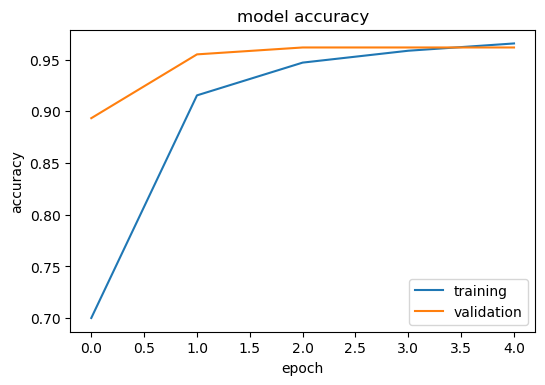

Test loss:  0.10399026661850512
Test accuracy:  0.9666000008583069


In [38]:
from keras import backend as K
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

if K.image_data_format() == 'channels_first':
    x_train_reshaped = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test_reshaped = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train_reshaped = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test_reshaped = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train_reshaped = normalize_data(x_train_reshaped)
x_test_reshaped = normalize_data(x_test_reshaped)

# train with less data (takes too long otherwise)
x_train_small = x_train_reshaped[:6000,:]
y_train_small = y_train_one_hot[:6000,:]
print(x_train_small.shape)

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    optimizer="adadelta",
    loss='categorical_crossentropy',
    metrics=['acc'])

history = fit_model(model, x_train_small, y_train_small)
evaluate_model(model, history, x_test_reshaped, y_test_one_hot)

## Apply Model

In [40]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
<button onclick="classify_digit()">Classify</button>
</td>
</table>
"""

javascript = '''
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0;
    var click = 0;

    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2);
            y = Math.floor(e.offsetX * 0.2) + 1;
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1;
                    }
                }
            }
        } else {
            if (click == 1) set_value();
            click = 0;
        }
    });
    
    function set_value(){
        var result = "";
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ",";
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0;
    }
    
    function classify_digit() {
        IPython.notebook.execute_cells([IPython.notebook.get_selected_index()+1])
    }
</script>
'''

from IPython.display import HTML
HTML(input_form + javascript)

In [ ]:
img_array = np.array(image)
img_array = img_array.reshape(1, 28, 28, 1)
predictions = model.predict(img_array)

%matplotlib inline 
fig = plt.figure(figsize=(4,2))
subplot = fig.add_subplot(1,1,1)
subplot.set_xticks(range(10))
subplot.set_xlim(-0.5,9.5)
subplot.set_ylim(0,1)
subplot.bar(range(10), predictions[0], align='center')
fig.show()

Anmerkung: Damit dieses Zeichentool funktioniert, muss der Code mit dem Convolutional Neural Network ausgeführt worden sein.<br><br>
*Note: The code with the Convolutional Neural Network must be executed first, so that this sign will work.*

# Hausübung

### Abgaberichtlinien
* Jede Hausübung bringt maximal 10 Hausaufgabenpunkte. 10 Hausaufgabenpunkte entsprechen einem Klausurpunkt.
* Im Laufe des Semesters kann es zusätzliche Bonuspunkte (= 1 Klausurpunkt) für Hausübungen geben, in Form von z.B. Challenges, weitere Informationen folgen bei den betreffenden Hausübungen.
* Die Abgabe erfolgt in Zweier- oder Dreierteams. **Einzelabgaben werden nicht gewertet**. Die Teammitglieder müssen nicht in derselben Übungsgruppe sein. Bei Problemen bzw. Einzelfällen hinsichtlich dieser Richtlinie kontaktieren Sie einen Tutor.
* In der Abgabe müssen alle Teammitglieder mit **Namen und Matrikelnummern gut sichtbar** genannt werden.
* Es muss immer nur **ein Teammitglied der Gruppe abgeben**. Sollten aus Versehen mehrere Abgaben der selben Übung erfolgen, kommunizieren Sie dies **zeitnah** an einen Tutor, ansonsten wird die erste korrigierte Abgabe gewertet.
* Die Abgabe soll als Jupyter-Notebook erfolgen (.ipynb). Abgaben in einem **anderen Format werden nicht gewertet**. Bei Problemen hinsichtlich dieser Richtlinie kontaktieren Sie einen Tutor.
* Es ist nicht nötig, den Präsenzübungsteil in der Abgabe mit abzugeben. Es wird lediglich der Hausübungsteil gewertet.
* Wenn Bilder mit abgegeben werden, ist es erlaubt, diese zusammen mit dem Notebook als zip-Ordner abzugeben. Diese sollten folgendermaßen eingefügt werden: ``![Beispiel1](Beispielbild1.PNG)`` (ohne Apostrophe in einer Markdown-Cell).

### *Submission guidelines*
* *You can reach up to 10 homework points for every homework submission. 10 homework points correspond to one exam point.*
* *In the course of the semester, there will be extra bonus points (where each bonus point equals to one exam point) for the homeworks. These will be given in the form of e.g. challenges inside the homeworks. More information will be given in the corresponding homeworks.*
* *The submission has to be done by a team of two to three people. **Individual submissions will not be graded**. The team members do not have to attend the same exercise group. If there are any problems regarding this guideline, please reach out to a tutor.*
* *Please state the **name and matriculation number of all team members** in every submission **clearly**.*
* *Only **one team member should submit** the homework. If more than one version of the same homework is submitted by accident (submitted by more than one group member), please reach out to a tutor **as soon as possible**. Otherwise, the first submitted homework will be graded.*
* *The submission must be in a Jupyter Notebook format (.ipynb). Submissions in **other formats will not be graded**. If there are any problems regarding this guideline, please reach out to a tutor.*
* *It is not necessary to also submit the part of the exercise discussed by the tutor, please only submit the homework part.*
* *If pictures need to be submitted, it is allowed to hand them in in a zip folder, together with the notebook. They should be added to the notebook like this: ``![example1](examplepicture1.PNG)`` (without apostrophs in a Markdown-Cell).*

<div class="task_description">
    <i class="task">Homework 1:</i>
        ::: 10 Hausaufgabenpunkte :::</div>

Ihre Aufgabe ist es, ein Modell (MLP) zu entwickeln, das besser funktioniert als das Basismodell. Verschiedene Ideen
die Sie ausprobieren können:
* Verändern Sie die Netzwerkstruktur, z.B. die Anzahl der Knoten im Hidden Layer und/oder die Anzahl der Hidden Layers.
* Verändern Sie die Werte der Hyperparameter, z.B. die Learning Rate.
* Ändern Sie die Trainingsparameter, z.B. die Anzahl der Epochen.
* Probieren Sie ein paar Callbacks aus, welche sich mit bestimmten Hyperparametern beschäftigen (z.B. EarlyStopping oder ReduceLROnPlateau)
* Recherchieren Sie, welche Modelle für dieses Problem besonders gut funktionieren.

Beachten Sie, dass Sie die Testdaten nicht kennen und daher die Gefahr besteht, dass Sie ihr Modell zu sehr an die Trainingsdaten fitten.


Bitte geben Sie folgende Ergebnisse ab:
* Ein Jupyter Notebook mit ihrem Code
* Eine Beschreibung der von Ihnen eingereichten Konfiguration (auch im Notebook): 
    * Welche Netzwerkstruktur und welche Hyperparameter haben Sie verwendet und warum? 
    * Welche weiteren Veränderungen haben Sie vorgenommen? Warum halten Sie Ihre Konfiguration für am besten geeignet?
* Eine kurze Diskussion der zu erwartenden Klassifikationsqualität und wie Sie diese bestimmt haben(auch im Notebook).

Die volle Punktzahl für die Hausaufgabe ist unabhängig vom Abschneiden in der Challenge.


*Your task is to develop a model that works better than the basic model. Different ideas that you can try out:*
* *Change the network structure, e.g. the number of nodes in the hidden layer and/or the number of hidden layers.*
* *Change the values of the hyper parameters, such as the learning rate.*
* *Change the training parameters, for example, the number of epochs.*
* *Experiment with callbacks which automatically deal with specific hyperparameters (e.g. EarlyStopping or ReduceLROnPlateau)*
* *Find out which models work best for this problem.*
<br>

*Note that you do not know the test data and that there is therefore a danger that you fit your model too closely to the training data.*
<br>
<br>
*Please submit the following results:*<br>
* *A Jupyter Notebook with your code*
* *A description of the configuration you submitted (also in notebook):*
    * *Which network structure and which hyper parameters did you use and why?*
    * *What other changes have you made? Why do you think your configuration is best?*
* *A brief discussion of the expected classification quality and how you determined it(also in notebook).*

*The full score for the homework is independent of the results in the challenge.*

<div class="task_description">::: 1 Extra-Klausurbonuspunkt ::: </div>

Ein Extra-Klausurbonuspunkt wird an die 5 bestplazierten Teams vergeben. Die Endergebnisse werden in der Vorlesung präsentiert.


*An extra bonus point will be awarded to the 5 best placed teams. The final results will be presented in the lecture.*

### Code for Homework

In [ ]:
import keras
import matplotlib.pyplot as plt

import numpy as np

from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential
from random import randint

# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
num_classes = 10
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes)

# print first 5 labels as categorial and one-hot
for i in range(5):
    print(y_train[i], " -> ", y_train_one_hot[i])
    
# Flatten the images as we are not using CNN here
img_rows, img_cols = 28, 28
image_size = img_rows * img_cols

batch_size = 128
epochs = 10

# normalize into [0,1]
def normalize_data(x):
    x = x.astype('float32')
    x /= 255
    return x

In [ ]:
%matplotlib inline 
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train[randint(0, x_train.shape[0])], cmap='Greys')
    
plt.show()

In [ ]:
def fit_model(model, xtrain, ytrain):
    history = model.fit(xtrain, ytrain,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=True,
                        validation_split=.1)
    return history
    
def evaluate_model(model, history, xtest, ytest):


    score = model.evaluate(xtest, ytest, verbose=False)

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()
 
    print("Test loss: ", score[0])
    print("Test accuracy: ", score[1])

In [ ]:
print("Original shape: ", x_train.shape)
x_train_reshaped = x_train.reshape(x_train.shape[0], image_size)
x_test_reshaped = x_test.reshape(x_test.shape[0], image_size)
print("After flattening: ", x_train_reshaped.shape)

x_train_reshaped = normalize_data(x_train_reshaped)
x_test_reshaped = normalize_data(x_test_reshaped)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(image_size,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    optimizer="sgd",
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history = fit_model(model, x_train_reshaped, y_train_one_hot)
evaluate_model(model, history, x_test_reshaped, y_test_one_hot)